# Word Cloud generator
With this notebook you can generate some wordclouds rappresenting the most common words in the tweets.

Said tweets are taken from a csv and then they are cleaned from twitter specific stuff (links, emojies and so on)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re


In [40]:
csvPath = './Data/tweetsUS.csv' #input Path
header_list = ["Id", "Date", "Lang", "Text"] #csv headers
tweets = pd.read_csv(csvPath, names=header_list)
tweets.head()

,Id,Date,Lang,Text
0,1227372076505264128,2020-02-11 23:21:21+00:00,en,b'UPDATE: 3-year-old Annabel Wucinski was take...
1,1227670752570347522,2020-02-12 19:08:11+00:00,en,b'Humanity must fight #COVID-19 AS ONE/STOP sa...
2,1228069539751092226,2020-02-13 21:32:49+00:00,en,b'@SenTomCotton For clarity the official name ...
3,1227824948699377664,2020-02-13 05:20:54+00:00,en,b'Interview w/ @CGTNOfficial on difficulties i...
4,1227757079282081793,2020-02-13 00:51:12+00:00,en,b'Coronavirus: Up To 24 Days Before Symptoms S...


In [41]:
start_date = '2020-04-15'
end_date = '2021-04-20'
mask = (tweets['Date'] >= start_date) & (tweets['Date'] <= end_date)
tweets = tweets.loc[mask]

print('# of tweets left: {}'.format(tweets.shape[0]))


# of tweets left: 48891


In [42]:
def CleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove tags
    text = re.sub(r'RT[\s]+', '', text) #remove ReTweets
    text = re.sub(r'https?:\/\/\S+', '', text) #remove links
    text = re.sub(r'\\\S+', '', text) #Remove emojies and sp chars
    text = re.sub(r'b\'', '', text) #remove the "b'"
    return text

In [43]:
tweets['Text'] = tweets['Text'].apply(CleanText)
tweets.head()

,Id,Date,Lang,Text
13649,1250573760433963008,2020-04-15 23:56:33+00:00,en,Another great delivery for our #frontliners pr...
13650,1250573573300854784,2020-04-15 23:55:49+00:00,en,Thanks benjaminjay231 for these awesome custom...
13651,1250571275912822784,2020-04-15 23:46:41+00:00,en,Podcast 61. How One #Beauty Entrepreneur Stays...
13652,1250570473601146881,2020-04-15 23:43:30+00:00,en,Misting with and ULV Fogger #Covid19 #Covid #C...
13653,1250569872544804871,2020-04-15 23:41:06+00:00,en,Norm has the right idea. #keepcalm #bekind #w...


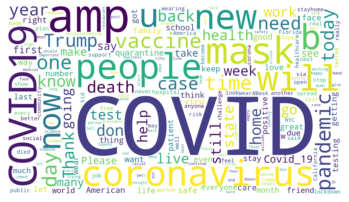

In [48]:
AllWords = ''.join([tweet for tweet in tweets['Text']])
wordCloud = WordCloud(width=1920,
                    height = 1080,
                    random_state=21,
                    background_color='white',
                    collocations=False).generate(AllWords)

wordCloud.to_file('wordCloud.png')

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()